# Log Parser Notebook
Exploratory notebook for testing out parsing the logs for workflow statistics


In [1]:
%load_ext autoreload
%autoreload 2
import logging
import datetime
import time
import glob

import os
filenames = sorted(glob.glob(os.path.join(os.path.dirname(os.getcwd()), "log/run/**/*.log")))

# log_path = configure_logging(os.path.join(os.path.dirname(os.getcwd()), "log/run/123456.789"))

In [ ]:
# TODO: better logs: https://www.toptal.com/python/in-depth-python-logging
def configure_logging(save_path='', log_filename='logfile', log_level=logging.INFO):
    """Log to the terminal and to file simultaneously."""
    timestamp = datetime.datetime.fromtimestamp(time.time()).strftime(
        '%Y%m%d.%H%M%S')  # datetime.now().strftime("_%Y-%m-%d_%H-%M-%S")
    logging.basicConfig(
        format="%(asctime)s — %(name)s — %(levelname)s — %(funcName)s:%(lineno)d — %(message)s", #"%(asctime)s %(levelname)s %(message)s",
        level=log_level,
        # Multiple handlers can be added to your logging configuration.
        # By default log messages are appended to the file if it exists already
        handlers=[
            logging.FileHandler(save_path+'/'+log_filename+timestamp+'.log'),
            logging.StreamHandler(),
        ])
    return save_path+'/'+log_filename+timestamp+'.log'


### Fake Log Generator

In [ ]:
import random
# generate random log messages
supported_feature_types = ["image_centre", "lamella_centre", "needle_tip", "lamella_edge", "landing_post"]
for i in range(100):


    RANDOM_NUM = random.randint(0, 5)

    if RANDOM_NUM > 4:
        feature_type = random.choice(supported_feature_types)
        response = random.choice([True, False])
        logging.info(f"ml_detection: {feature_type}: {response}")
    elif RANDOM_NUM > 3:
        diff = random.randint(-120, 120)
        gam = random.random() * 2.0
        logging.info(f"gamma_correction: diff: {diff:.3f}: gam: {gam:.3f} ")
    
    else:
        logging.info(f"random other log message not with the same structure {random.random():.2f}")


## Log Parser

In [15]:

from LogParser import parse_log_file, plot_ml_data, plot_gamma_data, plot_state_dict
from pprint import pprint

filenames = sorted(glob.glob(os.path.join(os.path.dirname(os.getcwd()), "log/run/**/*.log")))
log_path = filenames[-1]
# log_path = r"C:\Users\Admin\Github\autoliftout\liftout\log\run\20211020.155258\logfile_20211020.155258.log"
log_path = r"C:\Users\Admin\Github\autoliftout\liftout\log\run\20211027.160458/logfile_20211027.160458.log"
# log_path = r"C:\Users\Admin\Github\autoliftout\liftout\log\run\20211027.165108/logfile_20211027.165108.log"
print(log_path)
score_dict, gamma_dict, stage_dict = parse_log_file(log_path)
pprint(score_dict)
# pprint(gamma_dict)
# pprint(stage_dict)

C:\Users\Admin\Github\autoliftout\liftout\log\run\20211027.160458/logfile_20211027.160458.log
2021-10-27 16:04:58,727 — root — INFO — __init__:81 — Initialisation STARTED
2021-10-27 16:04:58,727 — root — INFO — __init__:82 — gui: starting in online mode
2021-10-27 16:04:59,227 — root — INFO — setup_connections:1468 — gui: setup connections started
2021-10-27 16:04:59,227 — root — INFO — setup_connections:1494 — gui: setup connections finished
2021-10-27 16:04:59,228 — root — INFO — pre_run_validation:176 — Running pre run validation
2021-10-27 16:04:59,228 — root — WARNING — pre_run_validation:192 — validation_errors=['needle_calibration']
2021-10-27 16:04:59,228 — root — INFO — pre_run_validation:193 — Finished pre run validation: 1 issues identified.
2021-10-27 16:04:59,229 — root — INFO — __init__:173 — Initialisation FINISHED
2021-10-27 16:05:03,834 — root — INFO — initialise_autoliftout:198 — Setup STARTED
2021-10-27 16:05:03,835 — root — INFO — flat_to_beam:349 — movement: moving

## Machine Learning Evaluation

       image_centre  lamella_centre  needle_tip  lamella_edge  landing_post
True              5               6           0             1             3
False             0               6           4             3             1
<class 'matplotlib.axes._subplots.AxesSubplot'>


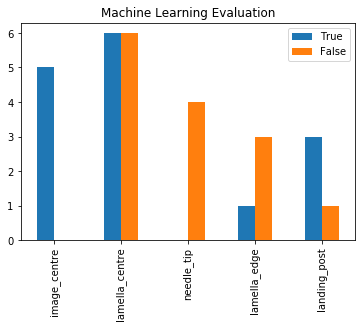

In [29]:
# eval
import matplotlib.pyplot as plt
%matplotlib inline

# TODO: better plots and analysis

ax, df_ml=plot_ml_data(score_dict)
# plt.savefig('ml_statistics.png')


     gamma    diff
0    1.000  31.021
1    1.000  20.572
2    1.000  11.753
3    1.000  13.264
4    1.000  12.071
..     ...     ...
218  0.537 -46.281
219  1.000   8.427
220  0.528 -47.177
221  1.000   8.602
222  0.528 -47.158

[223 rows x 2 columns]


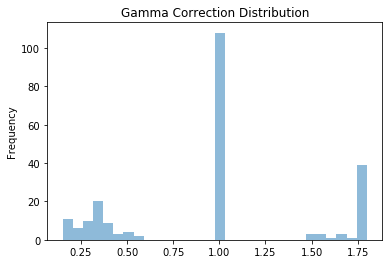

In [22]:
_, df_gamma = plot_gamma_data(gamma_dict)
print(df_gamma)

## Gamma Correction Evaluation
evaluate the average gamma correction


In [18]:

# pprint(gamma_dict)
# df_gamma = pd.DataFrame(gamma_dict)
# print(df_gamma)

# df_gamma["gamma"].plot.hist(bins=5, alpha=0.5, title="Gamma Correction Distribution")

### Status Evaluation

Initialisation: 0:00:01
Setup: 0:11:04
Milling: 0:13:01
Liftout: 0:06:25
{'Initialisation': 1.0, 'Setup': 664.0, 'Milling': 781.0, 'Liftout': 385.0}
   Initialisation  Setup  Milling  Liftout
0             1.0  664.0    781.0    385.0


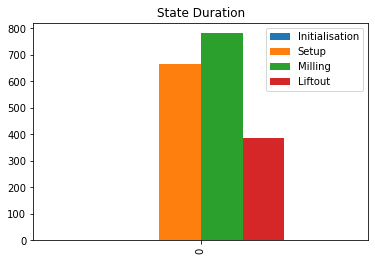

In [21]:
# pprint(stage_dict)
_, df = plot_state_dict(stage_dict)
print(df)


In [37]:
logdir = os.path.dirname(logfile)
yaml_file = os.path.join(logdir, "sample.yaml")
print(yaml_file)

%matplotlib inline
import yaml
with open(yaml_file, 'r') as f:
    sample_yaml = yaml.safe_load(f)

x_coords = []
y_coords = []
for sample_no in sample_yaml["sample"].keys():
    lamella_coords = sample_yaml["sample"][sample_no]["lamella_coordinates"]
    x, y = lamella_coords["x"], lamella_coords["y"]
    print(x, y)
    x_coords.append(x)
    y_coords.append(y)
    plt.scatter(x, y, label=f"Lamella Sample {sample_no}")
min_x, max_x = min(x_coords), max(x_coords)
min_y, max_y = min(y_coords), max(y_coords)
margin = 0.0005
plt.title("Sample Grid Coordinates")
plt.legend(loc="best")
plt.ylim(min_y-margin, max_y+margin)
plt.xlim(min_x-margin, max_x+margin)
plt.show()

/Users/patrickcleeve/Documents/university/bio/demarco/autoliftout/liftout/log/run/123456.789/sample.yaml


FileNotFoundError: [Errno 2] No such file or directory: '/Users/patrickcleeve/Documents/university/bio/demarco/autoliftout/liftout/log/run/123456.789/sample.yaml'

# Extract data for labelling


In [ ]:
from liftout.detection import utils

In [ ]:
%matplotlib inline
log_dir = os.path.dirname(os.path.dirname(log_path))
utils.extract_img_for_labelling(log_dir)

# Report Generation
Automatically generate a report summarising the liftout run


C:\\Users\\Admin\\Github\\autoliftout\\liftout\\log/run\\20211027.160458\\logfile_20211027.160458.log
Initialisation: 0:00:01
Setup: 0:11:04
Milling: 0:13:01
Liftout: 0:06:25
{'Initialisation': 1.0, 'Setup': 664.0, 'Milling': 781.0, 'Liftout': 385.0}


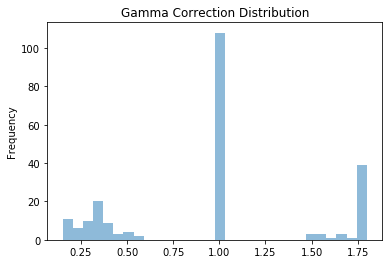

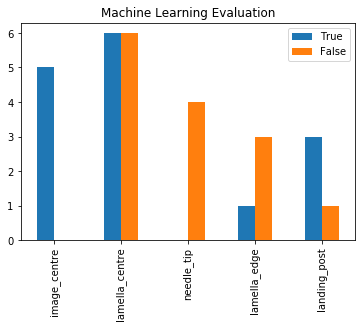

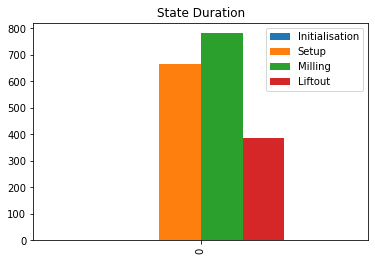

In [ ]:
# TODO:
# more than one lamella stats
# count how many lamellas
# summary: stages completed, total duration, summary stats etc
# show all images?
# show failed images?
# show reference images from each stage? as a summary


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
/Users/patrickcleeve/Documents/university/bio/demarco/autoliftout/liftout/log/run/20211027.160458/logfile_20211027.160458.log
132
Processing 0 images for sharpen
Processing 19 images for liftout
Processing 32 images for landing
Processing 44 images for drift_correction
Processing 22 images for jcut
Seen: 117, Unseen: 19
HTML Report Generated


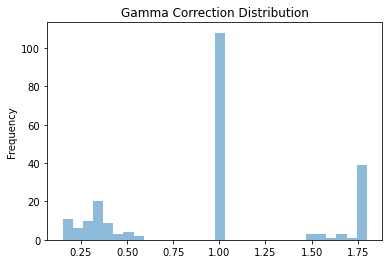

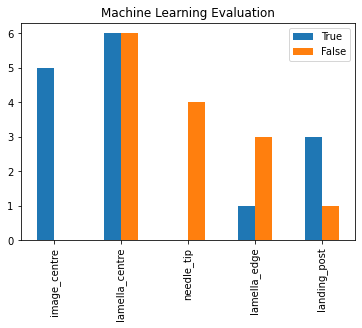

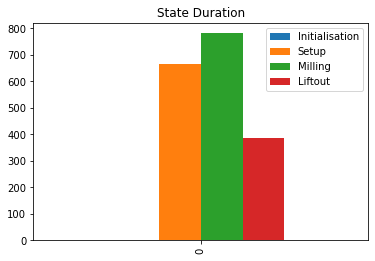

In [22]:


# https://www.justintodata.com/generate-reports-with-python/
# https://www.xlwings.org/blog/reporting-with-python

# CSS
# https://pythonhow.com/python-tutorial/flask/Adding-CSS-styling-to-your-website/
%load_ext autoreload
%autoreload 2
import logging
import datetime
import time
import glob

import os
import matplotlib.pyplot as plt

import numpy as np
import pandas as pd
from random import shuffle

from PIL import Image

import os
import glob
from liftout.tools.LogParser import parse_log_file, plot_gamma_data, plot_ml_data, plot_state_dict
filenames = sorted(glob.glob(os.path.join(os.path.dirname(os.getcwd()), "log/run/**/*.log")))

# print(filenames[-2:])

logfile = "/Users/patrickcleeve/Documents/university/bio/demarco/autoliftout/liftout/log/run/20211027.160458/logfile_20211027.160458.log"
# logfile = r"C:\\Users\\Admin\\Github\\autoliftout\\liftout\\log/run\\20211027.160458\\logfile_20211027.160458.log"
# logfile = r"C:\\Users\\Admin\\Github\\autoliftout\\liftout\\log/run\\20211027.165108\\logfile_20211027.165108.log"
print(logfile)

log_path = os.path.dirname(logfile)
ml_dict, gamma_dict, state_dict = parse_log_file(logfile)



# gamma plot overwrite if it isnt first?
ax, df_gamma = plot_gamma_data(gamma_dict)
plt.savefig(os.path.join(log_path, "gamma_statistics.png"))

ax, df_ml = plot_ml_data(ml_dict)
plt.savefig(os.path.join(log_path, "ml_statistics.png"))


ax, df_state_duration = plot_state_dict(state_dict)
plt.savefig(os.path.join(log_path, "state_duration_statistics.png"))

def generate_html_report(logfile):
    
    log_path = os.path.dirname(logfile)
    img_path = os.path.join(log_path, "img")
    filenames = glob.glob(os.path.join(img_path ,"*.tif")) # images

    page_title_text='AutoLiftout Report'
    title_text = 'AutoLiftout Report'
    text = f"AutoLiftout report for run: {log_path}"
    gamma_text = "Gamma Correction Statistics"
    ml_stats_text = "Machine Learning Statistics"
    state_duration_text = "State Duration Statistics"
    
    print(f"Total Images: {len(filenames)}")
    seen_filenames = []
    
    img_text = f"{len(filenames)} images taken during run. "
    
    
    for filt_exp in ["sharpen", "liftout", "landing", "drift_correction", "jcut"]:
        
        
        # filter to images we want.. e.g. sharpen only
        filt_filenames = list(filter(lambda x: filt_exp in os.path.basename(x), filenames))
        print(f"Processing {len(filt_filenames)} images for {filt_exp}")
    
        # need to convert tif images to png to display in html...
        NO_IMAGES_TO_DISPLAY = 5
        images = [np.asarray(Image.open(fname).convert("RGB")) for fname in filt_filenames[:NO_IMAGES_TO_DISPLAY]]
        if len(images) > 0:
            base_img = images[0]
            for img in images[1:]:
                base_img = np.hstack((base_img, img))


            img = Image.fromarray(base_img)
            img.save(os.path.join(log_path, f"{filt_exp}.png"))
            
            seen_filenames.append(filt_filenames)
        
    seen_filenames = [x for sublist in seen_filenames for x in sublist]

    
    unseen = [fname for fname in filenames if fname not in seen_filenames]
    
    print(f"Seen: {len(seen_filenames)}, Unseen: {len(unseen)}")
    # TODO: need some logic to decide which images to show, but just assume all are there for now
    

    # 2. Combine them together using a long f-string
    html = f'''
        <html>
            <head>
                <title>{page_title_text}</title>
            </head>
            <body>
                <h1>{title_text}</h1>
                <p>{text}</p>
                
                
                <h2>{gamma_text}</h2>
                {df_gamma.describe().to_html()}
                <img src='{os.path.join(log_path, "gamma_statistics.png")}' width="700">
                <h2>{ml_stats_text}</h2>
                {df_ml.to_html()}
                <img src='{os.path.join(log_path, "ml_statistics.png")}' width="700">
                <h2>{state_duration_text}</h2>
                {df_state_duration.to_html()}
                <img src='{os.path.join(log_path, "state_duration_statistics.png")}' width="700">
                
                <h2>Liftout Images</h2>
                <p>{img_text}</p>
                <p>Liftout</p>
                <img src='{os.path.join(log_path, "liftout.png")}' width="1500">
                <p>J-Cut</p>
                <img src='{os.path.join(log_path, "jcut.png")}' width="1500">
                <p>Drift Correction</p>
                <img src='{os.path.join(log_path, "drift_correction.png")}' width="1500">
                <p>Landing</p>
                <img src='{os.path.join(log_path, "landing.png")}' width="1500">
                <p>Sharpen Needle</p>
                <img src='{os.path.join(log_path, "sharpen.png")}' width="1500">
                

            </body>
        </html>
        '''
    # 3. Write the html string as an HTML file
    with open(os.path.join(log_path, "html_report.html"), "w") as f:
        f.write(html)
        
    print("HTML Report Generated")

generate_html_report(logfile)